In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib.widgets import Slider
import mpl_interactions.ipyplot as iplt

In [3]:
T=pd.read_csv('C:\\Users\\Zachary\\Downloads\\completeStarData.csv')
X=[]

In [4]:
path_to_images='C:/Users/Zachary/Downloads/Data'
for i in range(684):
    im_full = cv2.imread(path_to_images + '/Galaxy' + str(int(i+1)) + '.png')
    im_full=np.mean(im_full/255,axis=2)
    X.append(im_full.flatten())

Best estimators:~125


In [10]:
#do not run it takes a long time
min_estimators = 5
max_estimators = 250
rng = range(min_estimators, max_estimators, 5)

errors = {'test': [], 'oob': []}
for n_est in rng:
    rf = RandomForestClassifier(n_estimators=n_est,warm_start=False)
    rf.fit(X,T)
    Y=rf.predict(X)
    test_score = rf.score(X,T)
    errors['test'].append(test_score)

Text(0.5, 0, '# estimators')

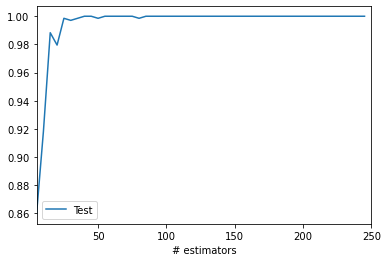

In [11]:
plt.plot(rng,errors['test'],label='Test')

plt.xlim(min_estimators, max_estimators)
plt.legend()
plt.xlabel("# estimators") 

In [6]:
#This takes about 5-10 minutes to run

rf = RandomForestClassifier(n_estimators=150,oob_score=True,warm_start=True)

rf.fit(X,T)
Y=rf.predict(X)
test_score = rf.score(X,T)
print("Test Accuracy: {} OOB Score:{}".format(test_score,rf.oob_score_))

Test Accuracy: 1.0 OOB Score:0.9538661468486029


In [7]:
print('Classification Report:\n',classification_report(T,Y))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        75
           5       1.00      1.00      1.00       125
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        54
          11       1.00      1.00      1.00       144
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        43
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00       141
          16       1.00      1.00      1.00        92
   

C:\Users\Zachary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zachary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


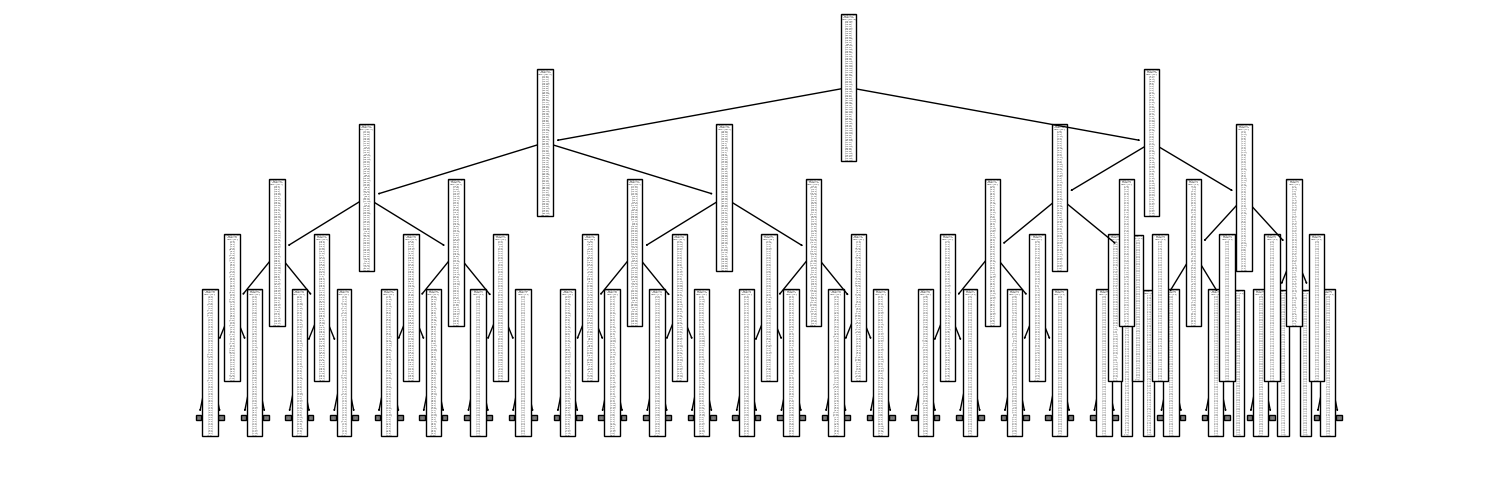

In [15]:
from sklearn import tree
fig1=plt.figure(figsize=(15,5))
tree.plot_tree(rf.estimators_[0],max_depth=5)
plt.show()

<IPython.core.display.Javascript object>


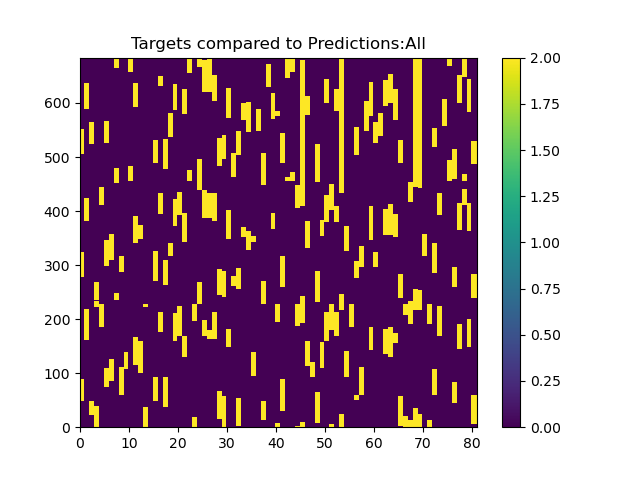

Text(0.5, 1.0, 'Targets compared to Predictions:All')

In [11]:
fig, ax = plt.subplots()

ax.pcolormesh(Y+T)
cf=ax.pcolorfast(Y+T)
plt.colorbar(cf,ax=ax)
plt.title('Targets compared to Predictions:All')

<IPython.core.display.Javascript object>


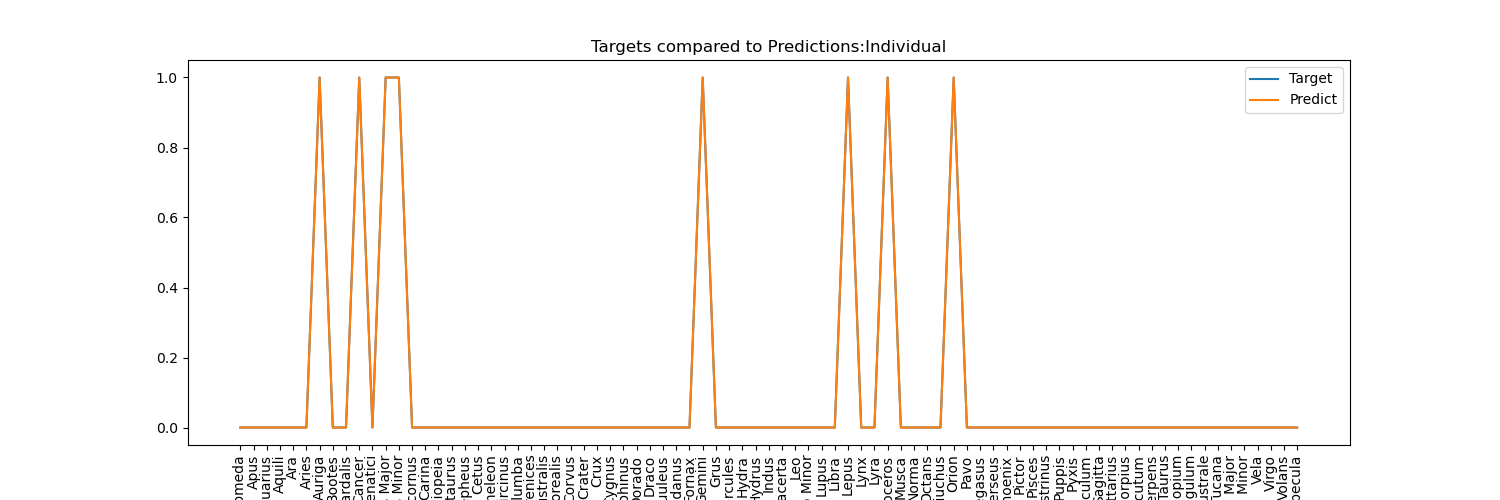

interactive(children=(IntSlider(value=342, description='val', max=684, min=1), Output()), _dom_classes=('widge…

<function __main__.update>

In [12]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=90)
line, = ax.plot(T.iloc[0],label='Target')
line2, = ax.plot(Y[0],label='Predict')
plt.title('Targets compared to Predictions:Individual')
plt.legend()
def update(val=(1,684)):
    line.set_ydata(T.iloc[val-1])
    line2.set_ydata(Y[val-1])
    fig.canvas.draw_idle()


interact(update)